## Testing Different Methods for Solving Linear Systems

In [1]:
from numpy import arange, empty, mean, dot
from numpy.random import rand
from SolvePartial import PartialPivot
from SolveLinear import GaussElim
from numpy.linalg import solve     # LU decomposition
from time import clock


N = arange(5, 301, 10)
n = len(N)
P_time, G_time, LU_time = empty(n), empty(n), empty(n)
P_err, G_err, LU_err = empty(n), empty(n), empty(n)

for i in range(n):
    A = rand(N[i], N[i])
    v = rand(N[i])
    
    t = clock()
    v1 = PartialPivot(A, v)
    P_time[i] = clock()-t
    P_err[i] = mean(abs(dot(A, v1)-v))

    t = clock()
    v2 = GaussElim(A, v)
    e = clock()
    G_time[i] = clock()-t
    G_err[i] = mean(abs(dot(A, v2)-v))

    t = clock()
    v3 = solve(A, v)
    e = clock()
    LU_time[i] = clock()-t
    LU_err[i] = mean(abs(dot(A, v3)-v))

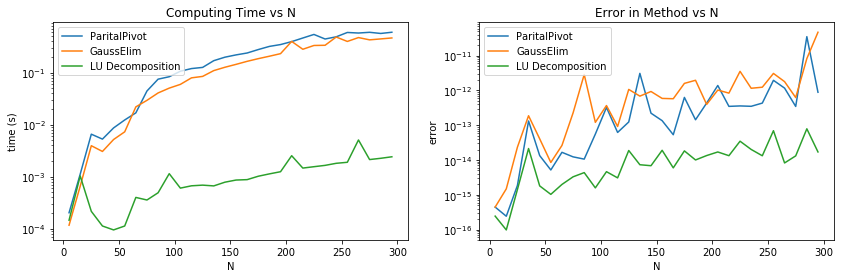

In [2]:
from pylab import figure, subplot, plot, yscale, xlabel, ylabel, title, legend, show

figure(1, figsize=(14, 4))
subplot(1,2,1)
plot(N, P_time, N, G_time, N, LU_time)
yscale('log')
xlabel('N'), ylabel('time (s)')
title('Computing Time vs N')
legend(('ParitalPivot', 'GaussElim', 'LU Decomposition'), loc='upper left')

subplot(1,2,2)
plot(N, P_err, N, G_err, N, LU_err)
yscale('log')
xlabel('N'), ylabel('error')
title('Error in Method vs N')
legend(('ParitalPivot', 'GaussElim', 'LU Decomposition'), loc='upper left')
show()